# 🏠 Housing EDA

This notebook performs an exploratory data analysis (EDA) on a housing dataset containing property features such as square footage, number of rooms, location, and price. The goal is to understand data patterns and prepare for a regression model to predict house prices.


In [72]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
#🔍 Load the dataset
file = 'real_estate_dataset.csv'
df = pd.read_csv(file)
df.head()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  500 non-null    int64  
 1   Square_Feet         500 non-null    float64
 2   Num_Bedrooms        500 non-null    int64  
 3   Num_Bathrooms       500 non-null    int64  
 4   Num_Floors          500 non-null    int64  
 5   Year_Built          500 non-null    int64  
 6   Has_Garden          500 non-null    int64  
 7   Has_Pool            500 non-null    int64  
 8   Garage_Size         500 non-null    int64  
 9   Location_Score      500 non-null    float64
 10  Distance_to_Center  500 non-null    float64
 11  Price               500 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 47.0 KB


In [75]:
df.describe()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,174.640428,2.958000,1.976000,1.964000,1957.604000,0.536000,0.492000,30.174000,5.164410,10.469641,582209.629529
std,144.481833,74.672102,1.440968,0.820225,0.802491,35.491781,0.499202,0.500437,11.582575,2.853489,5.588197,122273.390345
min,1.000000,51.265396,1.000000,1.000000,1.000000,1900.000000,0.000000,0.000000,10.000000,0.004428,0.062818,276892.470136
25%,125.750000,110.319923,2.000000,1.000000,1.000000,1926.000000,0.000000,0.000000,20.000000,2.760650,6.066754,503080.344140
50%,250.500000,178.290937,3.000000,2.000000,2.000000,1959.000000,1.000000,0.000000,30.000000,5.206518,10.886066,574724.113347
75%,375.250000,239.031220,4.000000,3.000000,3.000000,1988.000000,1.000000,1.000000,41.000000,7.732933,15.072590,665942.301274
max,500.000000,298.241199,5.000000,3.000000,3.000000,2022.000000,1.000000,1.000000,49.000000,9.995439,19.927966,960678.274291


This dataset describes 500 properties with features like size, bedrooms, bathrooms, floors, and year built. The average house has 175 sq.ft, nearly 3 bedrooms, 2 bathrooms, and 2 floors, built around 1958. About 54% have gardens and 49% have pools. Garage sizes vary from 10 to 49 sqft, with an average of 30. Location scores range from 0 to 10, averaging 5.16, while distance to center varies widely. Prices range from $276K$ to nearly $961K$, averaging $582K, showing diverse market values.

In [76]:
df.isnull().sum()

ID                    0
Square_Feet           0
Num_Bedrooms          0
Num_Bathrooms         0
Num_Floors            0
Year_Built            0
Has_Garden            0
Has_Pool              0
Garage_Size           0
Location_Score        0
Distance_to_Center    0
Price                 0
dtype: int64

In [77]:
df.duplicated().sum()

0

In [78]:
df = df.drop(['ID'], axis=1)

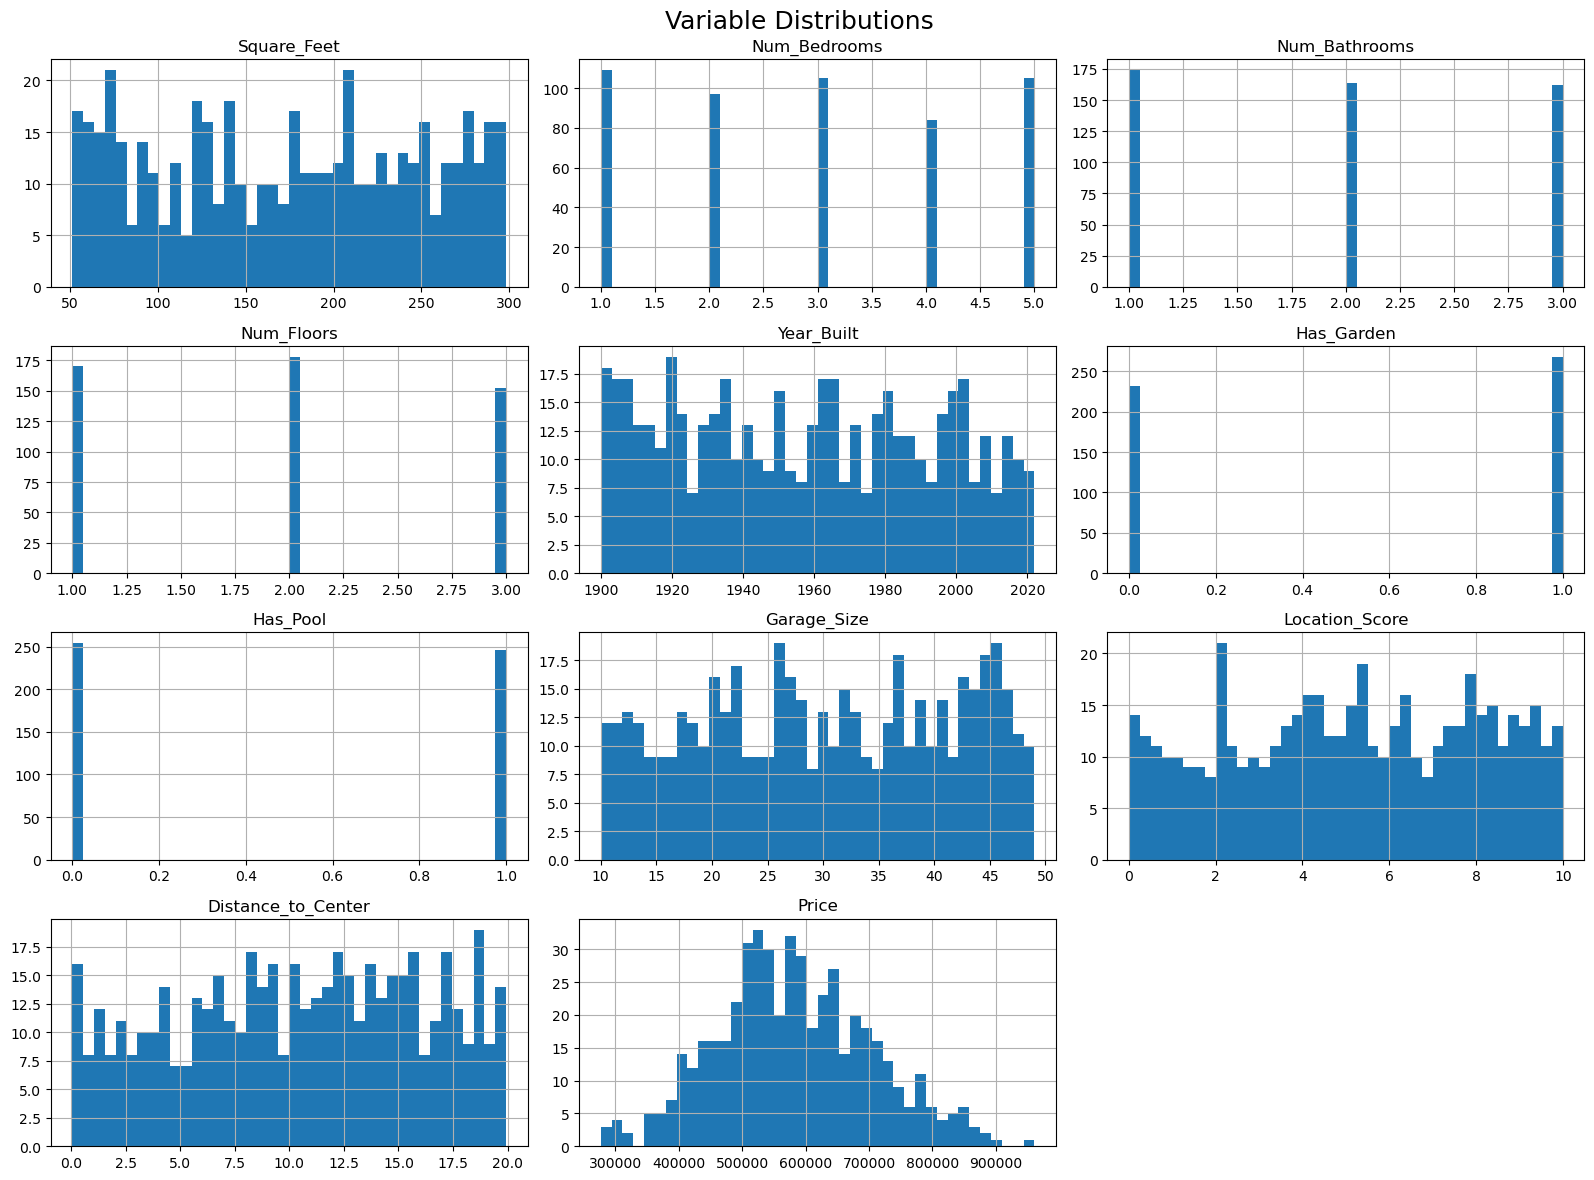

In [79]:
# Plot histograms of all variables 
df.hist(bins=40, figsize=(16,12))
plt.suptitle("Variable Distributions", fontsize=18)
plt.tight_layout()
plt.show()

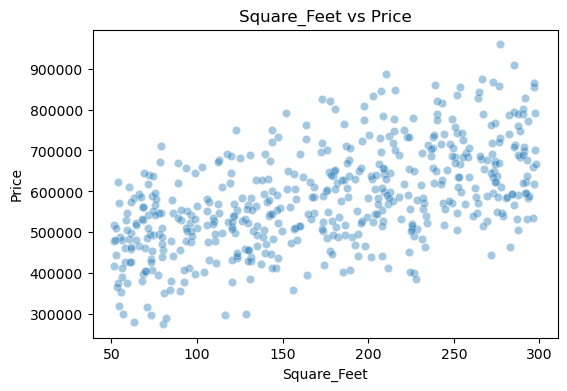

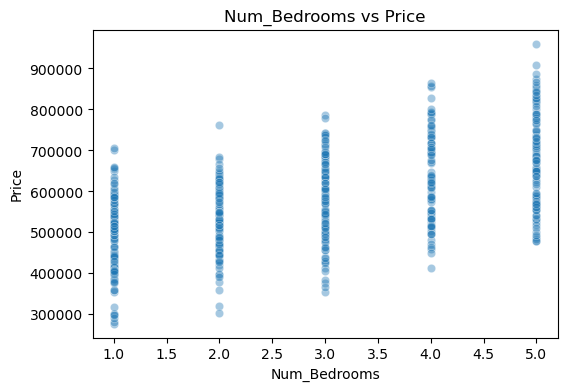

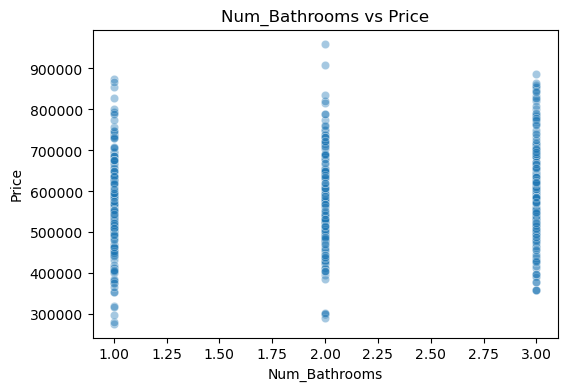

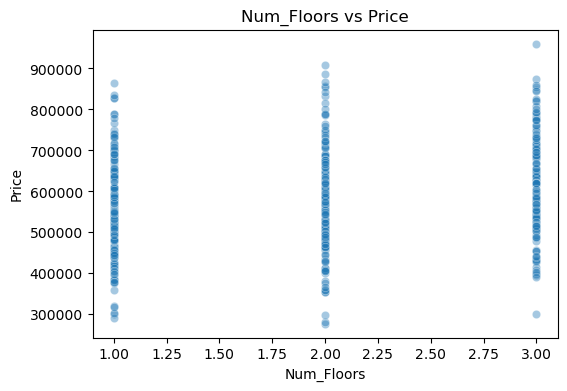

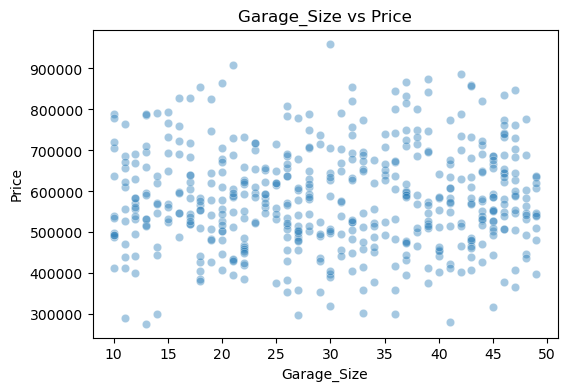

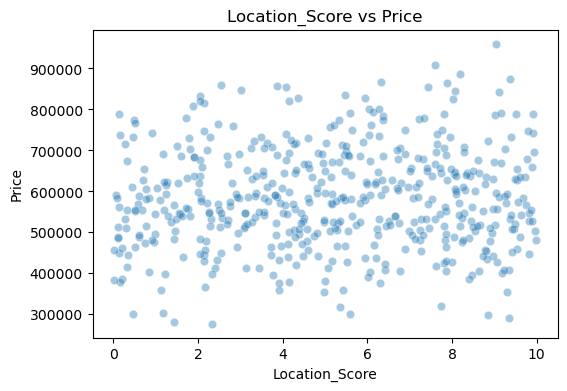

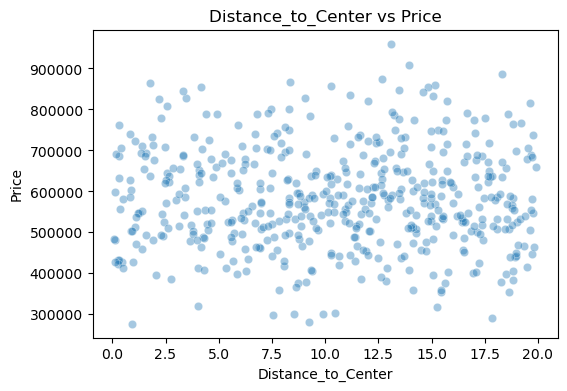

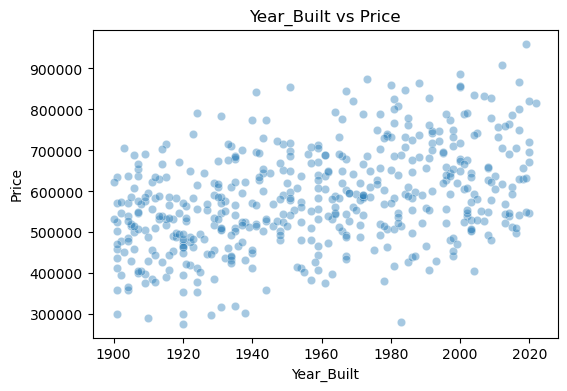

In [80]:
features = ['Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors', 'Garage_Size', 'Location_Score', 'Distance_to_Center', 'Year_Built']

for feature in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=feature, y='Price', alpha=0.4)
    plt.title(f'{feature} vs Price')
    plt.show()

We can observe that house prices have a strong relationship with the area, the number of bedrooms, and the year built, indicating these variables are likely very important for our prediction model.

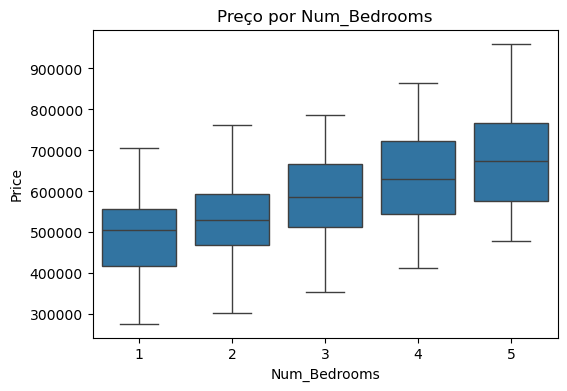

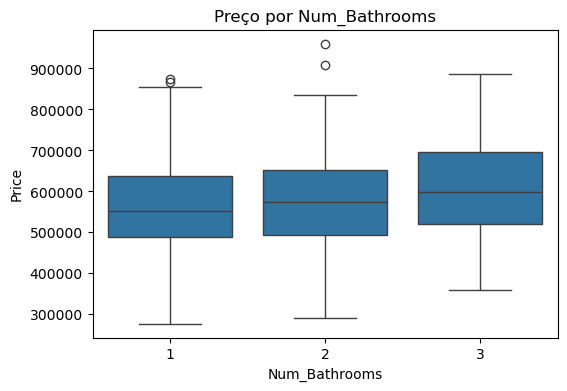

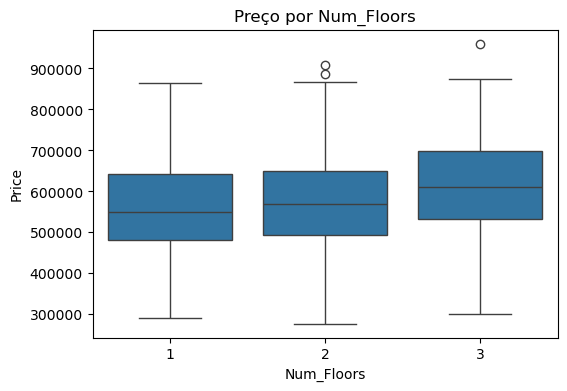

In [81]:
discrete_features = ['Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors']

for feature in discrete_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=feature, y='Price', data=df)
    plt.title(f'Preço por {feature}')
    plt.show()

These box plots confirm the strong correlation between house price and the number of bedrooms, and show that houses with varying numbers of bathrooms and floors exist across all price ranges. However, the average price tends to increase as the number of bathrooms and floors rises. Most importantly, the plots reveal outliers—houses with few bathrooms and floors but extremely high prices. These outliers could negatively impact our model and should be addressed before implementation.





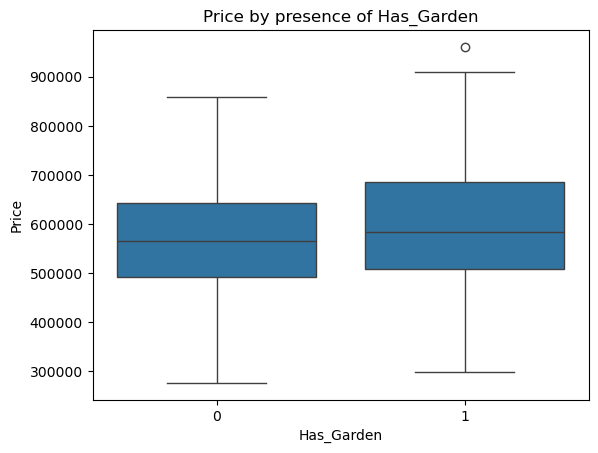

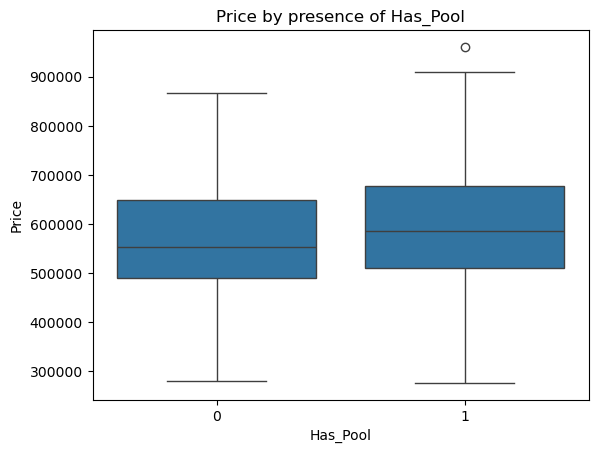

In [82]:
# Plot boxplots showing house prices based on presence of garden and pool
bin_features = ['Has_Garden', 'Has_Pool']

for feature in bin_features:
    sns.boxplot(data=df, x=feature, y='Price')
    plt.title(f'Price by presence of {feature}')
    plt.show()

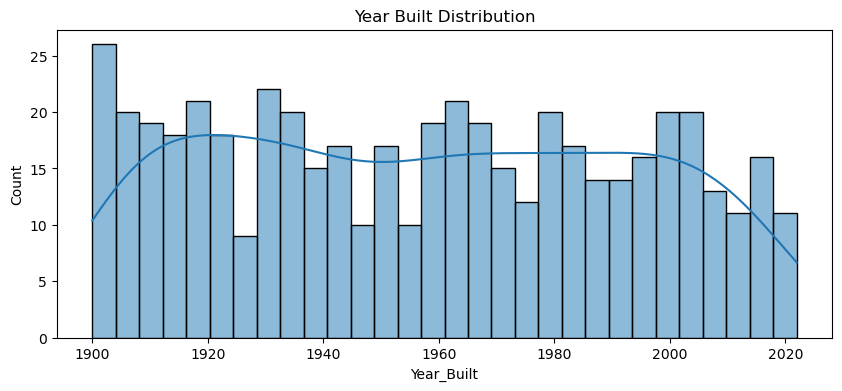

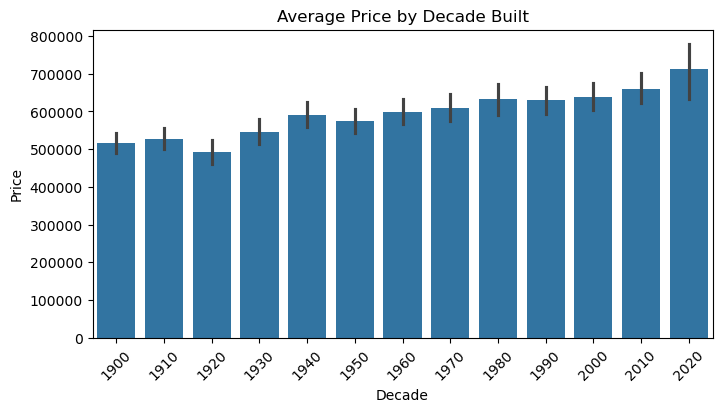

In [83]:
plt.figure(figsize=(10,4))
sns.histplot(df['Year_Built'], bins=30, kde=True)
plt.title('Year Built Distribution')
plt.show()

# Average price by decade of construction
df['Decade'] = (df['Year_Built'] // 10) * 10
plt.figure(figsize=(8,4))
sns.barplot(x='Decade', y='Price', data=df)
plt.title('Average Price by Decade Built')
plt.xticks(rotation=45)
plt.show()

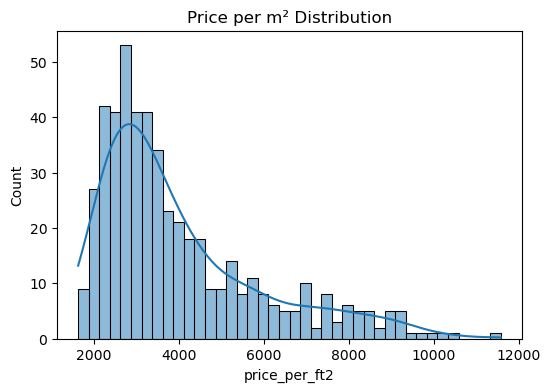

In [84]:
# Create a new column for price per square meter and plot its distribution
df['price_per_ft2'] = df['Price'] / df['Square_Feet']

plt.figure(figsize=(6,4))
sns.histplot(df['price_per_ft2'], bins=40, kde=True)
plt.title('Price per m² Distribution')
plt.show()


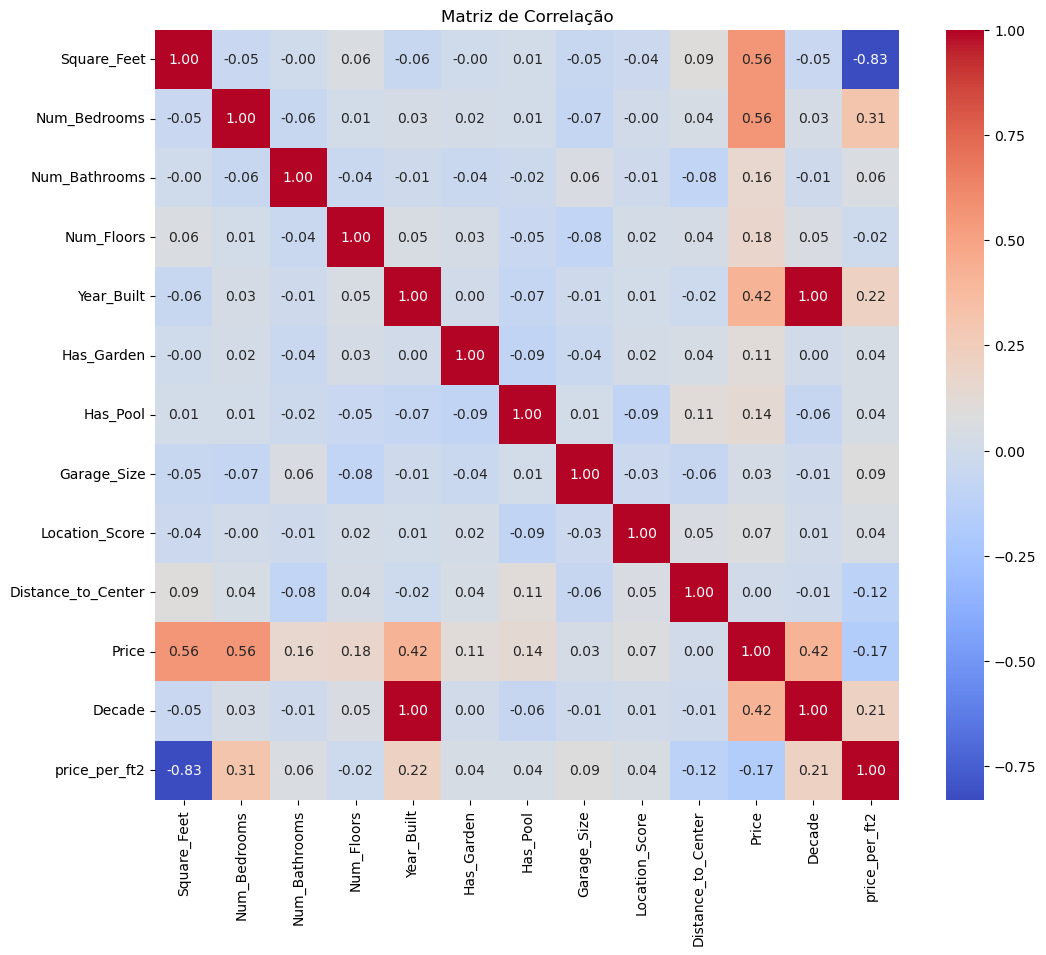

Price                 1.000000
Num_Bedrooms          0.563973
Square_Feet           0.558604
Decade                0.420786
Year_Built            0.418293
Num_Floors            0.177435
Num_Bathrooms         0.156689
Has_Pool              0.136579
Has_Garden            0.109196
Location_Score        0.071326
Garage_Size           0.032100
Distance_to_Center    0.000730
price_per_ft2        -0.170555
Name: Price, dtype: float64


In [85]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

# Correlação com o preço
print(corr['Price'].sort_values(ascending=False))


The correlation matrix confirms the linear dependence of certain variables and reveals that others have little impact on house prices. It also highlights that the engineered features provided valuable insights—for example, while a positive correlation between price per square meter and total price is expected, it’s common for smaller homes in high-value areas to have a higher price per ft² despite having a lower total price.